This dataset contains data on the Kings and Queens of England.

In this exercise we are gonna clean, merge, inspect and visualize this data and see how much information we can get from the dataset.

In [1]:
#first let´s import the necessary libraries
import pandas as pd
pd.options.mode.chained_assignment = None
from datetime import date
import matplotlib.pyplot as plt

Let´s load the dataset into a DataFrame:

In [2]:
df = pd.read_csv('Monarchs-of-England.csv')
 #Dataset doesn´t have any columns assigned, let´s create them and set the index to the 'name' column
df.columns=['startYear', 'endYear', 'name']
df = df.set_index('name')
df

,startYear,endYear
name,,
Egbert,802,839
Aethelwulf,839,856
Aethelbald,856,860
Aethelbert,860,866
Aethelred I,866,871
...,...,...
Edward VII,1901,1910
George V,1910,1936
Edward VIII,1936,1936


Doing a little search on Wikipedia I found out that it wasn´t always a Monarchy, there were a few years when England became a Republic, let´s create a column that indicates wheter England was ruled by a Monarch or not. (https://www.royal.uk/interregnum-1649-1660#:~:text=From%201649%20to%201660%2C%20England,workable%20constitution%20without%20a%20monarchy.)

In [3]:
df['Monarchy'] = 'yes'
#Replacing...
df.loc[(df.index == 'Commonwealth'), 'Monarchy'] = df.loc[(df.index == 'Commonwealth'), 'Monarchy'].replace('yes', 'no')
df.loc[(df.index == 'Oliver Cromwell'), 'Monarchy'] = df.loc[(df.index == 'Oliver Cromwell'), 'Monarchy'].replace('yes', 'no')
df.loc[(df.index == 'Richard Cromwell'), 'Monarchy'] = df.loc[(df.index == 'Richard Cromwell'), 'Monarchy'].replace('yes', 'no')
df

,startYear,endYear,Monarchy
name,,,
Egbert,802,839,yes
Aethelwulf,839,856,yes
Aethelbald,856,860,yes
Aethelbert,860,866,yes
Aethelred I,866,871,yes
...,...,...,...
Edward VII,1901,1910,yes
George V,1910,1936,yes
Edward VIII,1936,1936,yes


Now that we know wheter England had a Monarch on the throne or not, let´s get some insights on the dataset, I wonder how many Monarchs England has had, how many years has been it ruled by Monarchs?, how many years as a Republic?

In [4]:
#Getting the years as a Republic
RepublicOnly = df[df['Monarchy'] != 'yes']
Republicstart = RepublicOnly.iat[0,0]
RepublicOnly['endYear'] = pd.to_numeric(RepublicOnly['endYear'])
RepublicEnd = RepublicOnly.iat[2,1]
RepublicYears = RepublicEnd - Republicstart

#Getting the years as a Monarchy
MonarchyOnly = df[df['Monarchy'] != 'no']
current_year = date.today().year
startingYear = MonarchyOnly.iat[0,0]
reignYears = current_year - startingYear - RepublicYears

#Getting the number of Monarchs England has had
totalMonarchs = MonarchyOnly['startYear'].count()

#Printing observations
print('Total number of Monarchs: ', totalMonarchs)
print('Years ruled as a Monarchy: ', reignYears)
print('Years as a Republic: ', RepublicYears)

Total number of Monarchs:  61
Years ruled as a Monarchy:  1210
Years as a Republic:  10


By looking at our dataset when can see that there have been some female Monarchs, let´s create another column to identify the gender of our Rulers.

In [5]:
""" Use the .unique() function to get all unique values of a specified column, then you can create a series of female Monarchs for later reference.
    df['name'].unique()
    queens = [Mary I, Elizabeth I, William III of Orange and Mary II (jointly), Anne, Victoria, Elizabeth II]"""

#Let´s create a new column on the dataset and cast male as the default value
df['sex'] = 'male' 

#Now, replace on the rows where the Monarch is female
df.loc[(df.index == 'Mary'), 'sex'] = df.loc[(df.index == 'Mary'), 'sex'].replace('male', 'female')
df.loc[(df.index == 'Elizabeth I'), 'sex'] = df.loc[(df.index == 'Elizabeth I'), 'sex'].replace('male', 'female')
df.loc[(df.index == 'William III of Orange and Mary II (jointly)'), 'sex'] = df.loc[(df.index == 'William III of Orange and Mary II (jointly)'), 'sex'].replace('male', 'female') #In this case even tought we have WIlliam III, I choose to replace the entire row to female and not loosing this data 
df.loc[(df.index == 'Anne'), 'sex'] = df.loc[(df.index == 'Anne'), 'sex'].replace('male', 'female')
df.loc[(df.index == 'Victoria'), 'sex'] = df.loc[(df.index == 'Victoria'), 'sex'].replace('male', 'female')
df.loc[(df.index == 'Elizabeth II'), 'sex'] = df.loc[(df.index == 'Elizabeth II'), 'sex'].replace('male', 'female')

#Let´s see our new DataFrame...
df

,startYear,endYear,Monarchy,sex
name,,,,
Egbert,802,839,yes,male
Aethelwulf,839,856,yes,male
Aethelbald,856,860,yes,male
Aethelbert,860,866,yes,male
Aethelred I,866,871,yes,male
...,...,...,...,...
Edward VII,1901,1910,yes,male
George V,1910,1936,yes,male
Edward VIII,1936,1936,yes,male


Now that we can identify the gender of our Monarchs, let´s get more insights:
 How many year on average has a Monarch Ruled?
 , Which Monarch has ruled the longest?
 , Which male Monarch has ruled the longest?
 , Which male Monarch has ruled for the shortest time?
 , Which female Monarch has ruled the longest?
 , Which female Monarch has ruled for the shortest time?


In [6]:
#I choose to create a new DataFrame since we need to manipulate the dataset, let´s start by putting the current year on the last registrer of the column 'endYear'
df2 = df
for i in df2:
    df2.loc['Elizabeth II', 'endYear'] = current_year

#Create a column to calculate the years that a Ruler sat on the throne
df2['reigningYears'] = ''
startYear = df2['startYear']
df2['endYear'] = df2['endYear'].astype(str).astype(int) #Need to convert this data to int to calculate the ruling years
endYear = df2['endYear']
for i in df2:
    df2['reigningYears'] = df['endYear'] - df['startYear']

#Getting the average ruling years
avgRuler = df2['reigningYears'].mean()
print('On average Monarchs rule for {} years '.format(avgRuler))

#Getting the Monarch that has lasted the longest on the throne
maxRuler = df[df['reigningYears'] == df['reigningYears'].max()]
print('\n\nThe monarch who has lasted the longest on the throne is:')
print(maxRuler)

#Getting the male Monarch that has lasted the longest on the throne
maledf = df2[(df2['sex'] == 'male')]
maxKing = maledf[maledf['reigningYears'] == maledf['reigningYears'].max()]
print('\n\nThe male monarch who has lasted the longest on the throne is:')
print(maxKing)
#Getting the male Monarch that has lasted the shortest on the throne
minKing = maledf[maledf['reigningYears'] == maledf['reigningYears'].min()]
print('\n\nThe male monarchs who have lasted the shortes on the throne are:')
print(minKing)

#Getting the female Monarch that has lasted the longest on the throne
femaledf = df2[(df2['sex'] == 'female')]
maxQueen = femaledf[femaledf['reigningYears'] == femaledf['reigningYears'].max()]
print('\n\nThe female monarch who has lasted the longest on the throne is:')
print(maxQueen)
#Getting the female Monarch that has lasted the shortest on the throne
minQueen = femaledf[femaledf['reigningYears'] == femaledf['reigningYears'].min()]
print('\n\nThe female monarch who has lasted the shortest on the throne is:')
print(minQueen)

#It´s recommended to visualize this data on a text editor since it exceeds the size limit.

On average Monarchs rule for 19.03125 years 


The monarch who has lasted the longest on the throne is:
              startYear  endYear Monarchy     sex  reigningYears
name                                                            
Elizabeth II       1952     2022      yes  female             70


The male monarch who has lasted the longest on the throne is:
            startYear  endYear Monarchy   sex  reigningYears
name                                                        
George III       1760     1820      yes  male             60


The male monarchs who have lasted the shortes on the throne are:
                 startYear  endYear Monarchy   sex  reigningYears
name                                                             
Edmund lronside       1016     1016      yes  male              0
Harold II             1066     1066      yes  male              0
Edward V              1483     1483      yes  male              0
Edward VIII           1936     1936      yes  male       

Very interesting observations, there have been several male Monarchs who weren´t able to hold on to their power for more than a year, maybe they lived on periods of war?. A little search on Wikipedia might give help us.

Also, by looking at the names, they seem to have a pattern...let´s dig deep a little more on this:

In [17]:
#Create a new DataFrame using the MonarchOnly DataFrame, since we only want the names of the Rulers, this time we are gonna change the registrer or WIlliam III and Mary II so we can get the correct observations.
df3 = MonarchyOnly
df3.rename(index={'William III of Orange and Mary II (jointly)': 'Mary II'}, inplace = True)

"""Again, same as before, use the .unique() function to get all unique names, from there you can take thefirst letter of each unique name
    indf3.index.unique() """
ini = ['E', 'A', 'C', 'H', 'S', 'J', 'R', 'M', 'W', 'G', 'V']
ini.sort()
ini

['A', 'C', 'E', 'G', 'H', 'J', 'M', 'R', 'S', 'V', 'W']

Now that we know the first letter of the name of our Monarchs, let´s create a DataFrame for each letter so we can know the names that used that initial letter.

In [9]:
Aini = df3[(df3.index.str.startswith('A'))]
Aini

,startYear,endYear,Monarchy
name,,,
Aethelwulf,839,856,yes
Aethelbald,856,860,yes
Aethelbert,860,866,yes
Aethelred I,866,871,yes
Alfred the Great,871,899,yes
Athelstan,925,940,yes
Anne,1702,1714,yes


In [10]:
Cini = df3[(df3.index.str.startswith('C'))]
Cini

,startYear,endYear,Monarchy
name,,,
Cnut (Canute),1016,1035,yes
Charles I,1625,1649,yes
Charles II,1660,1685,yes


In [11]:
Eini = df3[(df3.index.str.startswith('E'))]
Eini

,startYear,endYear,Monarchy
name,,,
Egbert,802,839,yes
Edward the Elder,899,925,yes
Edmund,940,946,yes
Edred,946,955,yes
Edwy,955,959,yes
Edgar,959,975,yes
Edward the Martyr,975,978,yes
Ethelred II the Unready,978,1016,yes
Edmund lronside,1016,1016,yes


In [12]:
Gini = df3[(df3.index.str.startswith('G'))]
Gini

,startYear,endYear,Monarchy
name,,,
George I,1714,1727,yes
George II,1727,1760,yes
George III,1760,1820,yes
George IV,1820,1830,yes
George V,1910,1936,yes
George VI,1936,1952,yes


In [13]:
Hini = df3[(df3.index.str.startswith('H'))]
Hini

,startYear,endYear,Monarchy
name,,,
Harold I Harefoot,1035,1040,yes
Harthacanut,1040,1042,yes
Harold II,1066,1066,yes
Henry I,1100,1135,yes
Henry II,1154,1189,yes
Henry III,1216,1272,yes
Henry IV,1399,1413,yes
Henry V,1413,1422,yes
Henry VI,1422,1461,yes


In [14]:
Jini = df3[(df3.index.str.startswith('J'))]
Jini

,startYear,endYear,Monarchy
name,,,
John,1199,1216,yes
James I,1603,1625,yes
James II,1685,1688,yes


In [15]:
Mini = df3[(df3.index.str.startswith('M'))]
Mini

,startYear,endYear,Monarchy
name,,,
Mary I,1553,1558,yes
Mary II,1689,1694,yes


In [18]:
Rini = df3[(df3.index.str.startswith('R'))]
Rini

,startYear,endYear,Monarchy
name,,,
Richard I,1189,1199,yes
Richard II,1377,1399,yes
Richard III,1483,1485,yes


In [19]:
Sini = df3[(df3.index.str.startswith('S'))]
Sini

,startYear,endYear,Monarchy
name,,,
Stephen,1135,1154,yes


In [20]:
Vini = df3[(df3.index.str.startswith('V'))]
Vini

,startYear,endYear,Monarchy
name,,,
Victoria,1837,1901,yes


In [21]:
Wini = df3[(df3.index.str.startswith('W'))]
Wini

,startYear,endYear,Monarchy
name,,,
William I,1066,1087,yes
William II,1087,1100,yes
William III (alone),1694,1702,yes
William IV,1830,1837,yes


Now, let´s count how many names begin with their assocciated letter.

In [27]:
#Using the len() function we can get the count of rows of each DataFrame we created previously, in that way we can get the number of times a Monarch was named with a specific initial letter.
aini = len(Aini)
cini = len(Cini)
eini = len(Eini)
gini = len(Gini)
hini = len(Hini)
jini = len(Jini)
mini = len(Mini)
rini = len(Rini)
sini = len(Sini)
vini = len(Vini)
wini = len(Wini)

#Printing observations:
print('The  number of times that the letter A was used to name a Monarch is: {}'.format(aini))
print('The  number of times that the letter C was used to name a Monarch is: {}'.format(cini))
print('The  number of times that the letter E was used to name a Monarch is: {}'.format(eini))
print('The  number of times that the letter G was used to name a Monarch is: {}'.format(gini))
print('The  number of times that the letter H was used to name a Monarch is: {}'.format(hini))
print('The  number of times that the letter J was used to name a Monarch is: {}'.format(jini))
print('The  number of times that the letter M was used to name a Monarch is: {}'.format(mini))
print('The  number of times that the letter R was used to name a Monarch is: {}'.format(rini))
print('The  number of times that the letter S was used to name a Monarch is: {}'.format(sini))
print('The  number of times that the letter V was used to name a Monarch is: {}'.format(vini))
print('The  number of times that the letter W was used to name a Monarch is: {}'.format(wini))

The  number of times that the letter A was used to name a Monarch is: 7
The  number of times that the letter C was used to name a Monarch is: 3
The  number of times that the letter E was used to name a Monarch is: 20
The  number of times that the letter G was used to name a Monarch is: 6
The  number of times that the letter H was used to name a Monarch is: 11
The  number of times that the letter J was used to name a Monarch is: 3
The  number of times that the letter M was used to name a Monarch is: 2
The  number of times that the letter R was used to name a Monarch is: 3
The  number of times that the letter S was used to name a Monarch is: 1
The  number of times that the letter V was used to name a Monarch is: 1
The  number of times that the letter W was used to name a Monarch is: 4


Seems to me that the favorite initial letter is E by a long run, let´s see if we can create a visualization to get a better view of the data. 

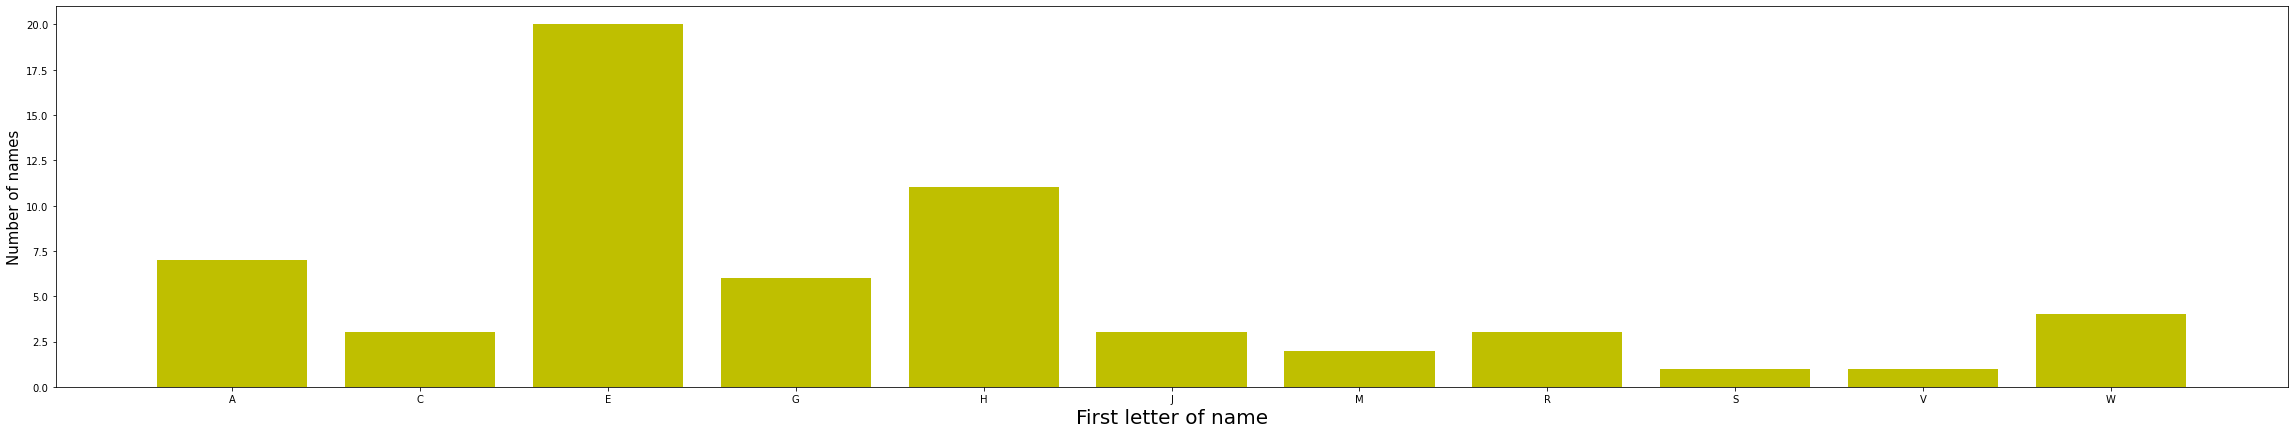

In [40]:
#Remember the series that we create when checking for unique first letters? It will come handy to plot our data
ini
#Let´s create a new series where we have the count of names with a specific initial letter:
countini = [aini, cini, eini, gini, hini, jini, mini, rini, sini, vini, wini]

#Plotting...
plt.rcParams['figure.figsize'] = (40,7) 
plt.bar(ini, countini, color = 'y')
plt.xlabel('First letter of name', fontsize = 20)
plt.ylabel('Number of names', fontsize = 15)
plt.show()

Yes, we can clearly see that the letter E was used the most when naming England´s Monarchs.

Finally, let´s visualize the years ruled by each Monarch throughout history and compare wheter or not they were above the average ruling years. 

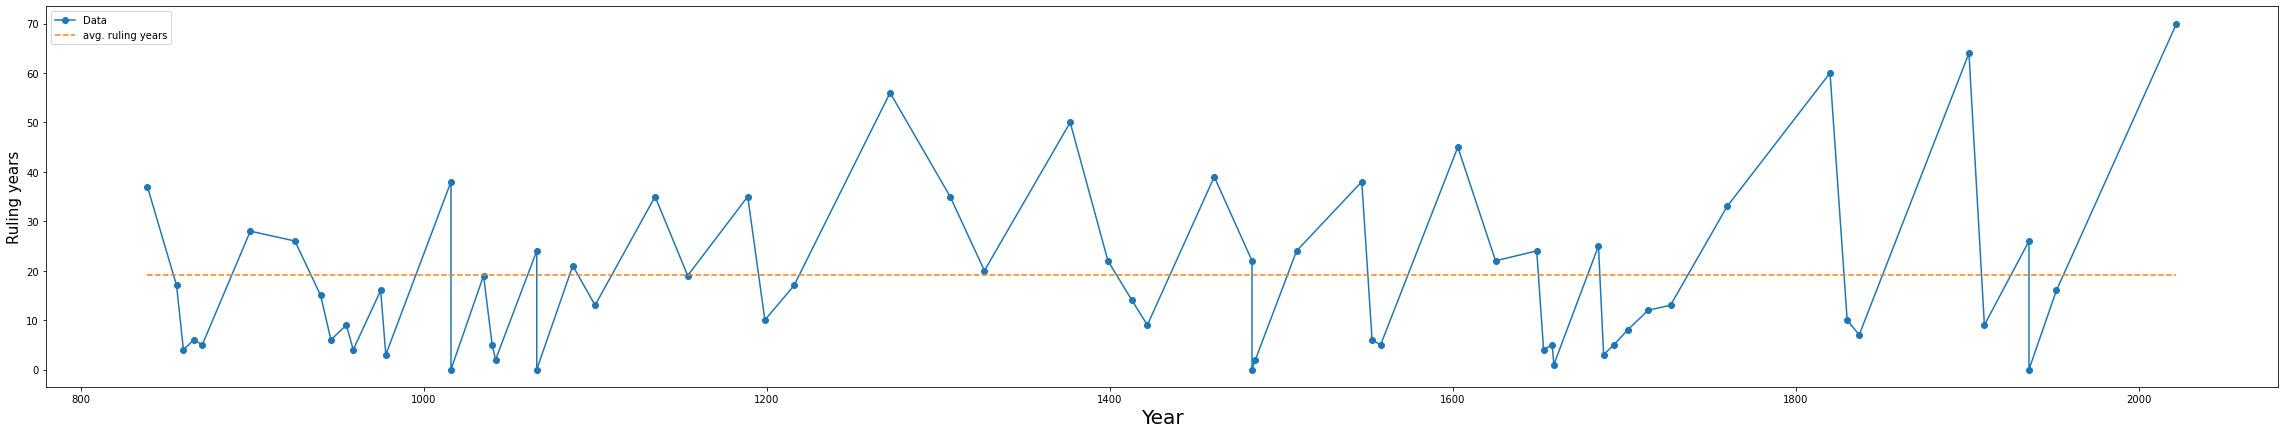

In [28]:
#Create a two series from the df2 DataFrame so we can plot the data, for this case we need the 'endYear' and the 'reiningYears' columns
year = df2['endYear']
rulingYears = df2['reigningYears']

#Now let´s plot the data using the matplotlib library only;
plt.rcParams['figure.figsize'] = (40,7) 
y_mean = [avgRuler]*(len(year))
fig, ax = plt.subplots()
data_line = ax.plot(year, rulingYears, label = 'Data', marker = 'o')
mean_line = ax.plot(year, y_mean, label = 'avg. ruling years', linestyle = '--')
legend = ax.legend(loc='upper left')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Ruling years', fontsize = 15)
plt.show()

From the looks of it, it appears that in recent centuries English Monarchs were more able to hold on to the crown much longer when compared with older Monarchs. Their history is fascinating. 

In the next Jupyter Notebook we will analyze them again, but this time we are gonna include the royal houses of each Monarch, there could be more interesting information obtained from that data.